# Predicting Shop Profile (Keras - ANN)

**Table of Contents**

1.   Overview
2.   Dataset
3. Exploratory Data Analysis
4. Working with Feature Data
5. Feature Engineering
6. Scaling and Train Test Split
7. Creating a Model
8. Training the Model
9. Evaluation on Test Data
10. Predicting on a Brand New House

## Overview

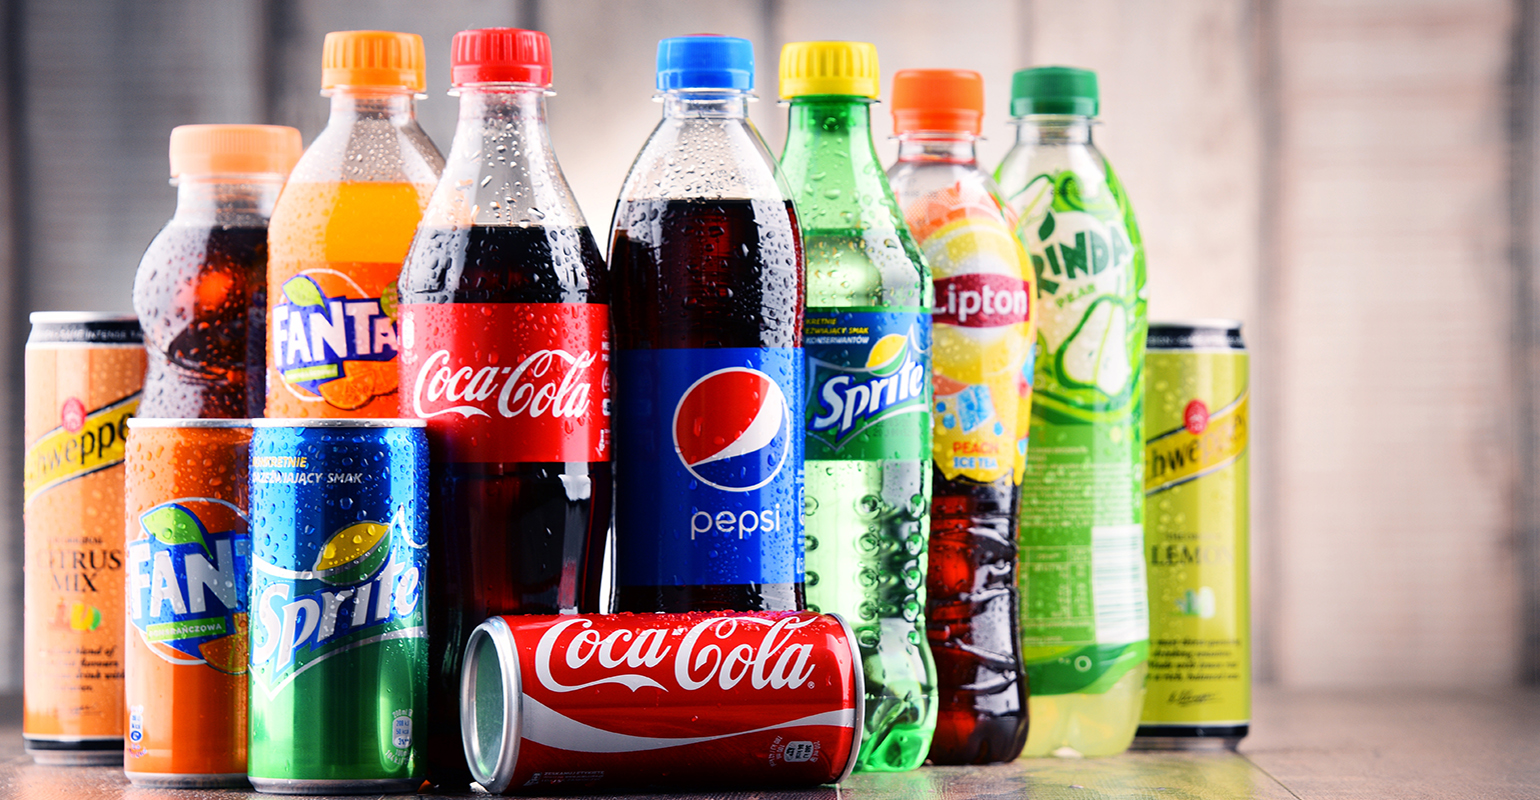

The following questions will be answered throughout the Kernel:

*   Which features are available in the dataset?
*   Which features are categorical?
* Which features are numerical?
* Which features contain blank, null or empty values?
* What are the data types for various features?
* What is the distribution of numerical feature values across the samples?
* Which features are more correlated to the price?



## Dataset



*   473974 rows
*   9 columns




**Feature Columns**



* item_description
* transaction_date
* invoice_id
* customer_id
* shop_id
* item_price
* quantity_sold
* shop_area_sq_ft
* shop_profile



**Imports**

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

**Acquire data**

In [ ]:
train_d = pd.read_csv('Historical-transaction-data.csv')
target_d = pd.read_csv('Store-info.csv')

df = pd.merge(train_d, target_d, on='shop_id')

test_df =  pd.read_csv('Testing-data.csv')
test_df = pd.merge(test_df, target_d, on='shop_id')
test_df =  pd.merge(train_d,test_df , on='shop_id')
test_df.drop(['shop_profile_x','shop_profile_y'], axis=1, inplace=True)
test_df = test_df.drop_duplicates(subset=['shop_id'], keep='first')

In [ ]:
shop_id_order = pd.read_csv('Testing-data.csv').shop_id # define the desired order of shop_ids
test_df['shop_id'] = pd.Categorical(test_df['shop_id'], categories=shop_id_order, ordered=True)
test_df = test_df.sort_values(by='shop_id')

In [ ]:
test_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft
1512,FIT O MIXED FRUIT 1L,2021-10-15T00:00:00.000Z,154826.0,H6RV,SHOP046,270.0,1.0,545
1963,NECTO 1.5L,2021-10-16T00:00:00.000Z,242099.0,MML5,SHOP024,220.0,1.0,676
145,ORANGE BARLEY 1.5L,2021-10-17T00:00:00.000Z,46224.0,A8YU,SHOP023,220.0,1.0,617
393,NaN,2021-10-15T00:00:00.000Z,52354.0,LTZY,SHOP097,65.0,2.0,310
1347,CREAM SODA 1.5L,2021-10-15T00:00:00.000Z,116362.0,S2UR,SHOP044,220.0,2.0,715
4678,SODA 500ML,2021-10-15T00:00:00.000Z,816598.0,OTMT,SHOP030,350.0,5.0,530
2732,TONIC PET 500ML,2021-10-18T00:00:00.000Z,313673.0,RDCS,SHOP038,160.0,2.0,411
3958,NECTO 500ML,2021-10-16T00:00:00.000Z,723399.0,B84T,SHOP029,100.0,2.0,597
962,GINGER BEER 500ML,2021-10-24T00:00:00.000Z,93430.0,NPQA,SHOP096,100.0,1.0,676
3145,FIT O ORANGE 200ML,2021-10-24T00:00:00.000Z,435506.0,B6OD,SHOP092,60.0,1.0,617


### Analyze by describing data

**Which features are available in the dataset?**

In [ ]:
print(df.columns.values)

['item_description' 'transaction_date' 'invoice_id' 'customer_id'
 'shop_id' 'item_price' 'quantity_sold' 'shop_area_sq_ft' 'shop_profile']


**Which features are categorical?**

> Categorical
*   item_description
*   invoice_id
*   customer_id
*   invoice_id
*   customer_id
*   shop_profile
*   shop_id




**Which features are numerical?**

> Continous:
* None 😶

> Discrete
*   item_price
*   quantity_sold
*   shop_area_sq_ft





In [ ]:
df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220.0,2.0,678,Moderate
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160.0,2.0,678,Moderate
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150.0,2.0,678,Moderate
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,220.0,1.0,678,Moderate
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,440.0,1.0,678,Moderate


In [ ]:
df.tail()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
30508,GINGER BEER 1.5L,2021-12-02T00:00:00.000Z,1480747.0,H55Q,SHOP072,220.0,2.0,617,High
30509,SODA PET 1.5L,2021-12-03T00:00:00.000Z,1481012.0,E5IS,SHOP072,160.0,2.0,617,High
30510,NECTO 1.5L,2021-12-04T00:00:00.000Z,1481142.0,FWY1,SHOP072,220.0,1.0,617,High
30511,NaN,2021-12-06T00:00:00.000Z,1481574.0,5Q2F,SHOP072,140.0,3.0,617,High
30512,CREAM SODA APPLE POP 1L,2021-12-15T00:00:00.000Z,1483433.0,MS6N,SHOP072,150.0,2.0,617,High


**Which features contain blank, null or empty values?**

In [ ]:
# No missing values
df.isnull().sum()

item_description    2294
transaction_date       0
invoice_id           285
customer_id            0
shop_id                0
item_price             0
quantity_sold          0
shop_area_sq_ft        0
shop_profile        5457
dtype: int64

**What are the data types for various features?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30513 entries, 0 to 30512
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_description  28219 non-null  object 
 1   transaction_date  30513 non-null  object 
 2   invoice_id        30228 non-null  float64
 3   customer_id       30513 non-null  object 
 4   shop_id           30513 non-null  object 
 5   item_price        30513 non-null  float64
 6   quantity_sold     30513 non-null  float64
 7   shop_area_sq_ft   30513 non-null  int64  
 8   shop_profile      25056 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.3+ MB


**What is the distribution of numerical feature values across the samples?**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
invoice_id,30228.0,1.774102e+06,1.288604e+06,147.0,733280.25,1511906.5,2446267.0,8324720.0
item_price,30513.0,2.050066e+02,1.657028e+02,35.0,100.00,200.0,220.0,4900.0
quantity_sold,30513.0,1.920231e+00,1.679110e+00,-1.0,1.00,2.0,2.0,71.0
shop_area_sq_ft,30513.0,6.235353e+02,1.226530e+02,298.0,565.00,617.0,676.0,1077.0


In [ ]:
df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220.0,2.0,678,Moderate
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160.0,2.0,678,Moderate
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150.0,2.0,678,Moderate
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,220.0,1.0,678,Moderate
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,440.0,1.0,678,Moderate


**Assumtions based on data analysis**

---


* Correlating
> We want to know how well does each feature correlate with Price. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

* Completing
> Since there are no missing values we do not need to complete any values.

* Correcting
> **"invoice_id"** feature may be dropped from our analysis since it does not add value. **"transaction_date"** feature may be dropped since we are going to do feature engineering and make a year and month column. **"customer_id"** , **"item_descripttion"** feature is a special case, we could use it, but since we do not know exactly we are just going to drop it.

* Creating
> We may want to create a new feature called **"day"** based on **"transaction_date"** to analyze the price change throughout the day of the week. We may want to create a new feature called **"month"** based on **"transaction_date"** to analyze the price change throughout the months.



In [ ]:
test_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft
1512,FIT O MIXED FRUIT 1L,2021-10-15T00:00:00.000Z,154826.0,H6RV,SHOP046,270.0,1.0,545
1963,NECTO 1.5L,2021-10-16T00:00:00.000Z,242099.0,MML5,SHOP024,220.0,1.0,676
145,ORANGE BARLEY 1.5L,2021-10-17T00:00:00.000Z,46224.0,A8YU,SHOP023,220.0,1.0,617
393,NaN,2021-10-15T00:00:00.000Z,52354.0,LTZY,SHOP097,65.0,2.0,310
1347,CREAM SODA 1.5L,2021-10-15T00:00:00.000Z,116362.0,S2UR,SHOP044,220.0,2.0,715


In [ ]:
df.drop(["invoice_id","item_description","customer_id","shop_id"],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['shop_profile'] = label_encoder.fit_transform(df['shop_profile'].astype(str))
df['inverse_shop_area'] = 1000/df['shop_area_sq_ft']
# replace 0s with 1s in 'quantity_sold'
df['quantity_sold'] = df['quantity_sold'].replace(0, 1)
# replace -1s with 1s in 'quantity_sold'
df['quantity_sold'] = df['quantity_sold'].replace(-1, 1)

df['each_item_price'] = df['item_price']/df['quantity_sold']
df['prod_item_quantity'] = df['item_price']*df['quantity_sold']

In [ ]:
df.head()

,transaction_date,item_price,quantity_sold,shop_area_sq_ft,shop_profile,inverse_shop_area,each_item_price,prod_item_quantity
0,2021-12-11T00:00:00.000Z,220.0,2.0,678,2,1.474926,110.0,440.0
1,2021-12-13T00:00:00.000Z,160.0,2.0,678,2,1.474926,80.0,320.0
2,2021-12-13T00:00:00.000Z,150.0,2.0,678,2,1.474926,75.0,300.0
3,2021-12-10T00:00:00.000Z,220.0,1.0,678,2,1.474926,220.0,220.0
4,2021-12-10T00:00:00.000Z,440.0,1.0,678,2,1.474926,440.0,440.0


In [ ]:
df.tail()

,transaction_date,item_price,quantity_sold,shop_area_sq_ft,shop_profile,inverse_shop_area,each_item_price,prod_item_quantity
30508,2021-12-02T00:00:00.000Z,220.0,2.0,617,0,1.620746,110.000000,440.0
30509,2021-12-03T00:00:00.000Z,160.0,2.0,617,0,1.620746,80.000000,320.0
30510,2021-12-04T00:00:00.000Z,220.0,1.0,617,0,1.620746,220.000000,220.0
30511,2021-12-06T00:00:00.000Z,140.0,3.0,617,0,1.620746,46.666667,420.0
30512,2021-12-15T00:00:00.000Z,150.0,2.0,617,0,1.620746,75.000000,300.0


## Exploratory Data Analysis

### Analyze by visualizing data

#### Pearson correlation matrix


<ipython-input-18-dbd91a3bcaf0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',


<Axes: title={'center': 'Pearson Correlation Matrix'}>

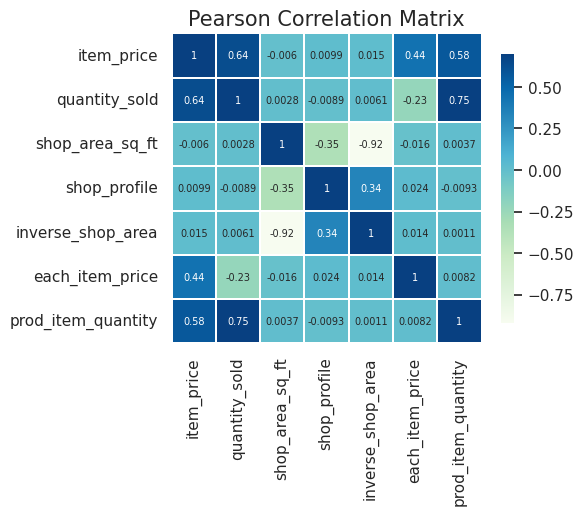

In [ ]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(5,5))
plt.title('Pearson Correlation Matrix',fontsize=15)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

#### Shop profile correlation

**Which features are more correlated to the shop profile?**

In [ ]:
shop_prof_corr = df.corr()['shop_profile'].sort_values(ascending=False)
print(shop_prof_corr)

shop_profile          1.000000
inverse_shop_area     0.336663
each_item_price       0.023653
item_price            0.009913
quantity_sold        -0.008919
prod_item_quantity   -0.009349
shop_area_sq_ft      -0.351923
Name: shop_profile, dtype: float64


<ipython-input-19-146bff98d4fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  shop_prof_corr = df.corr()['shop_profile'].sort_values(ascending=False)


#### Shop profile feature

<ipython-input-20-7db6c023b306>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['shop_profile'], ax=axes[0])


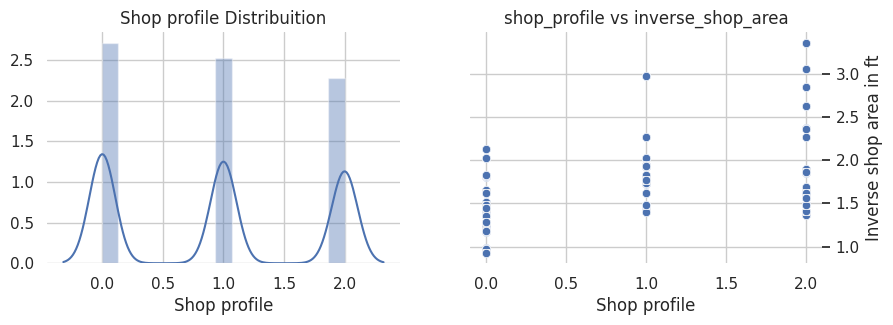

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(10,3))
sns.distplot(df['shop_profile'], ax=axes[0])
sns.scatterplot(x='shop_profile',y='inverse_shop_area', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Shop profile', ylabel='', title='Shop profile Distribuition')
axes[1].set(xlabel='Shop profile', ylabel='Inverse shop area in ft', title='shop_profile vs inverse_shop_area')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

<ipython-input-21-b8249cec8970>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['shop_profile'], ax=axes[0])


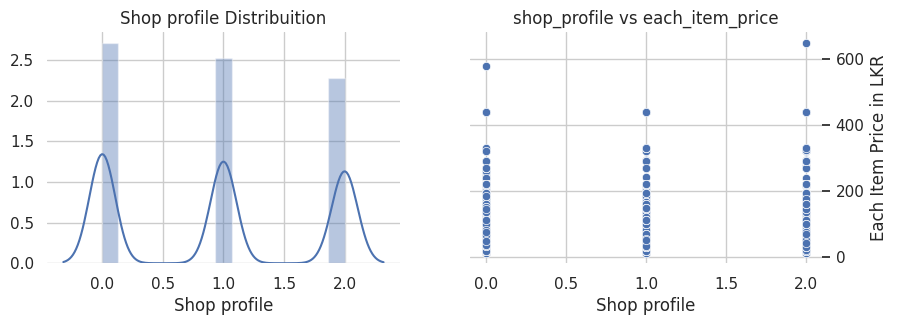

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(10,3))
sns.distplot(df['shop_profile'], ax=axes[0])
sns.scatterplot(x='shop_profile',y='each_item_price', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Shop profile', ylabel='', title='Shop profile Distribuition')
axes[1].set(xlabel='Shop profile', ylabel='Each Item Price in LKR', title='shop_profile vs each_item_price')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

In [ ]:
#origin_test_df['shop_profile'] = origin_test_df['shop_profile'].replace([0,1,2], ['High', 'Low', 'Moderate'])

#### Box plots

[Text(0, 0.5, 'Each Item Price (LKR)'),
 Text(0.5, 0, 'Shop Profile'),
 Text(0.5, 1.0, 'vs shop_profile each_item_price Box Plot')]

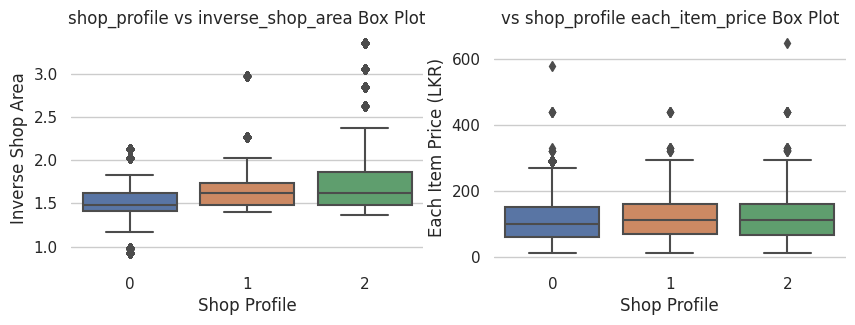

In [ ]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(10,3))
sns.boxplot(x=df['shop_profile'],y=df['inverse_shop_area'], ax=axes[0])
sns.boxplot(x=df['shop_profile'],y=df['each_item_price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(ylabel='Inverse Shop Area', xlabel='Shop Profile', title='shop_profile vs inverse_shop_area Box Plot')
axes[1].set(ylabel='Each Item Price (LKR)', xlabel='Shop Profile', title='vs shop_profile each_item_price Box Plot')

[Text(0, 0.5, 'quantity sold'),
 Text(0.5, 0, 'Shop Profile'),
 Text(0.5, 1.0, 'shop_profile vs quantity_sold Box Plot')]

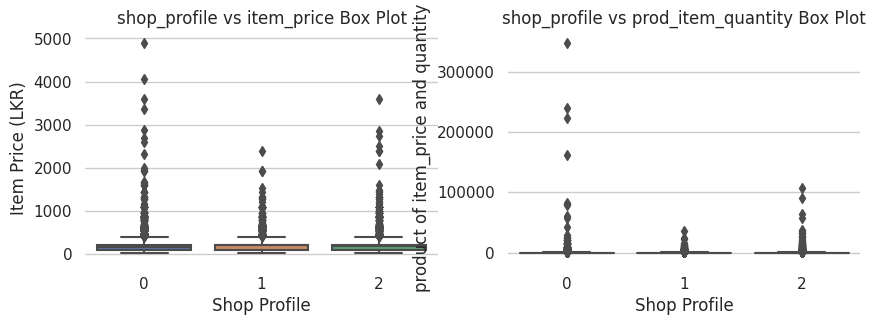

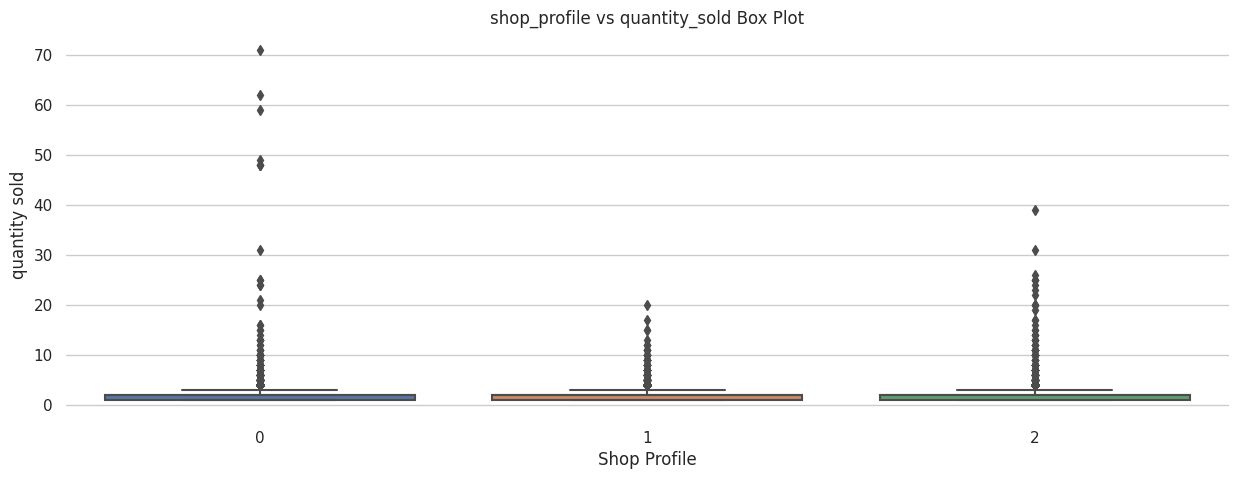

In [ ]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(10,3))
sns.boxplot(x=df['shop_profile'],y=df['item_price'], ax=axes[0])
sns.boxplot(x=df['shop_profile'],y=df['prod_item_quantity'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(ylabel='Item Price (LKR)', xlabel='Shop Profile', title='shop_profile vs item_price Box Plot')
axes[1].set(ylabel='product of item_price and quantity', xlabel='Shop Profile', title='shop_profile vs prod_item_quantity Box Plot')


f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['shop_profile'],y=df['quantity_sold'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(ylabel='quantity sold', xlabel='Shop Profile', title='shop_profile vs quantity_sold Box Plot')

## Working with Feature Data

### Correcting by dropping features

In [ ]:
# Already did this
# df.drop(["invoice_id","item_description","customer_id","shop_id"],axis=1,inplace=True)

## Feature engineering

In [ ]:
from datetime import datetime

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['month'] = df['transaction_date'].apply(lambda date:date.month)
# replace the values in the 'month' column (since only got 10,11 and 12 months)
df['month_idx'] = df['month'].replace({10: 0, 11: 1, 12: 2})
df.drop(['month'],axis=1,inplace=True)

# convert the 'date' column to a pandas Timestamp object
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# create a new column 'day' in the DataFrame using strftime
df['day'] = df['transaction_date'].dt.strftime('%w').astype(int)


df = df.drop('transaction_date',axis=1)

# Check the new columns
print(df.columns.values)

['item_price' 'quantity_sold' 'shop_area_sq_ft' 'shop_profile'
 'inverse_shop_area' 'each_item_price' 'prod_item_quantity' 'month_idx'
 'day']


### Shop Profile trends

[Text(0, 0.5, 'month index (10,11,12)'),
 Text(0.5, 0, 'shop profile'),
 Text(0.5, 1.0, 'month_idx by shop_profile Box Plot')]

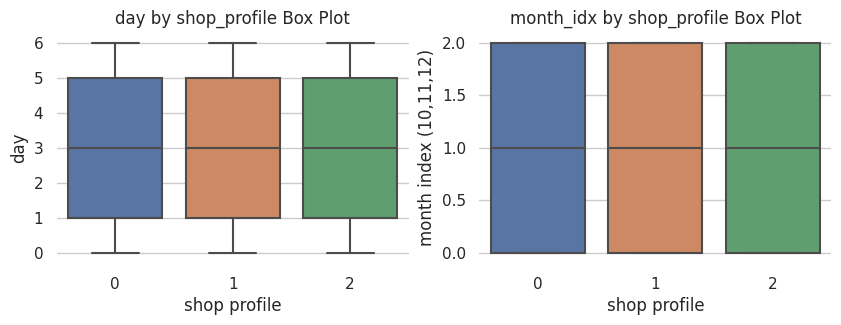

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(10,3))
sns.boxplot(x='shop_profile',y='day',data=df, ax=axes[0])
sns.boxplot(x='shop_profile',y='month_idx',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(ylabel='day', xlabel='shop profile', title='day by shop_profile Box Plot')
axes[1].set(ylabel='month index (10,11,12)', xlabel='shop profile', title='month_idx by shop_profile Box Plot')

[Text(0.5, 0, 'month_idx'),
 Text(0, 0.5, 'shop_profile'),
 Text(0.5, 1.0, 'shop profile Trends')]

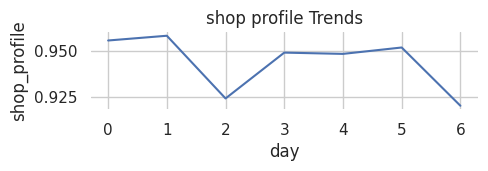

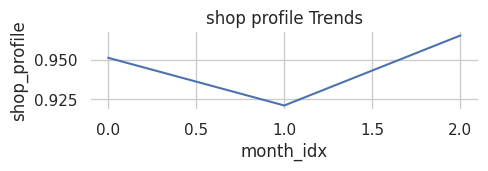

In [ ]:
f, axe = plt.subplots(1, 1,figsize=(5,1))
df.groupby('day').mean()['shop_profile'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='day', ylabel='shop_profile', title='shop profile Trends')

f, axe = plt.subplots(1, 1,figsize=(5,1))
df.groupby('month_idx').mean()['shop_profile'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='month_idx', ylabel='shop_profile', title='shop profile Trends')

[Text(0.5, 0, 'shop_profile'),
 Text(0, 0.5, 'month_idx'),
 Text(0.5, 1.0, 'shop profile Trends')]

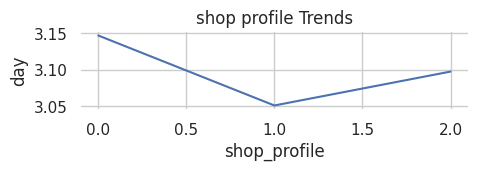

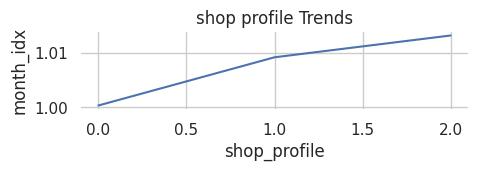

In [ ]:
f, axe = plt.subplots(1, 1,figsize=(5,1))
df.groupby('shop_profile').mean()['day'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='shop_profile', ylabel='day', title='shop profile Trends')

f, axe = plt.subplots(1, 1,figsize=(5,1))
df.groupby('shop_profile').mean()['month_idx'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='shop_profile', ylabel='month_idx', title='shop profile Trends')

## Scaling and train test split

In [ ]:
df.head()

,item_price,quantity_sold,shop_area_sq_ft,shop_profile,inverse_shop_area,each_item_price,prod_item_quantity,month_idx,day
0,220.0,2.0,678,2,1.474926,110.0,440.0,2,6
1,160.0,2.0,678,2,1.474926,80.0,320.0,2,1
2,150.0,2.0,678,2,1.474926,75.0,300.0,2,1
3,220.0,1.0,678,2,1.474926,220.0,220.0,2,5
4,440.0,1.0,678,2,1.474926,440.0,440.0,2,5


In [ ]:
# Features
X = df.drop('shop_profile',axis=1)

# Label
y = df['shop_profile']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17539, 8)
(7517, 8)
(17539,)
(7517,)


## Normalizing / scaling the data

In [ ]:
test_df.drop(["invoice_id","item_description","customer_id","shop_id"],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test_df['inverse_shop_area'] = 1000/test_df['shop_area_sq_ft']
# replace 0s with 1s in 'quantity_sold'
test_df['quantity_sold'] = test_df['quantity_sold'].replace(0, 1)
# replace -1s with 1s in 'quantity_sold'
test_df['quantity_sold'] = test_df['quantity_sold'].replace(-1, 1)

test_df['each_item_price'] = test_df['item_price']/test_df['quantity_sold']
test_df['prod_item_quantity'] = test_df['item_price']*test_df['quantity_sold']

from datetime import datetime

test_df['transaction_date'] = pd.to_datetime(test_df['transaction_date'])

test_df['month'] = test_df['transaction_date'].apply(lambda date:date.month)
# replace the values in the 'month' column (since only got 10,11 and 12 months)
test_df['month_idx'] = test_df['month'].replace({10: 0, 11: 1, 12: 2})
test_df.drop(['month'],axis=1,inplace=True)

# convert the 'date' column to a pandas Timestamp object
test_df['transaction_date'] = pd.to_datetime(test_df['transaction_date'])

# create a new column 'day' in the DataFrame using strftime
test_df['day'] = test_df['transaction_date'].dt.strftime('%w').astype(int)


test_df = test_df.drop('transaction_date',axis=1)

# Check the new columns
print(df.columns.values)

X_ = test_df

scaler = MinMaxScaler()

# fit and transfrom
# X_= scaler.transform(X_)

['item_price' 'quantity_sold' 'shop_area_sq_ft' 'shop_profile'
 'inverse_shop_area' 'each_item_price' 'prod_item_quantity' 'month_idx'
 'day']


In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_= scaler.transform(X_)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


## Creating a model

In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the model

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
138/138 [==============================] - 7s 6ms/step - loss: 0.7476 - val_loss: 0.5897
Epoch 2/400
138/138 [==============================] - 1s 4ms/step - loss: 0.5903 - val_loss: 0.5788
Epoch 3/400
138/138 [==============================] - 1s 4ms/step - loss: 0.5799 - val_loss: 0.5708
Epoch 4/400
138/138 [==============================] - 1s 5ms/step - loss: 0.5748 - val_loss: 0.5726
Epoch 5/400
138/138 [==============================] - 1s 5ms/step - loss: 0.5712 - val_loss: 0.5617
Epoch 6/400
138/138 [==============================] - 1s 4ms/step - loss: 0.5673 - val_loss: 0.5559
Epoch 7/400
138/138 [==============================] - 1s 4ms/step - loss: 0.5640 - val_loss: 0.5492
Epoch 8/400
138/138 [==============================] - 1s 5ms/step - loss: 0.5586 - val_loss: 0.5441
Epoch 9/400
138/138 [==============================] - 1s 4ms/step - loss: 0.5545 - val_loss: 0.5371
Epoch 10/400
138/138 [==============================] - 1s 6ms/step - loss: 0.5477 - val_lo

## Training loss per epoch

### Regression Evaluation Metrics



*   **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
*   **Mean Squared Error (MSE)** is the mean of the squared errors:
*   **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:



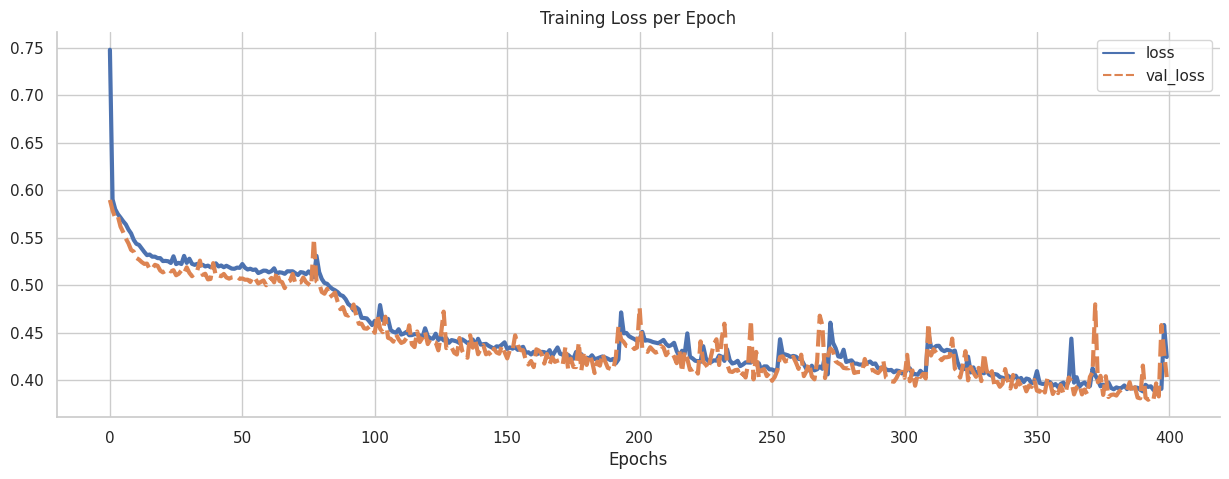

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

### Predicting on brand new data

In [ ]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['shop_profile'].describe())

235/235 [==============================] - 0s 1ms/step
MAE:  0.4742349671868706
MSE:  0.4034493227445426
RMSE:  0.6351766075230908
Variance Regression Score:  0.38533866635695146


Descriptive Statistics:
 count    25056.000000
mean         0.943247
std          0.813018
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: shop_profile, dtype: float64


In [ ]:
print(max(predictions))
print(min(predictions))
print(np.average(predictions))

[2.6725843]
[-0.26329103]
0.9506682


### Model predictions vs perfect fit

<ipython-input-40-ea87b6dbbf6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

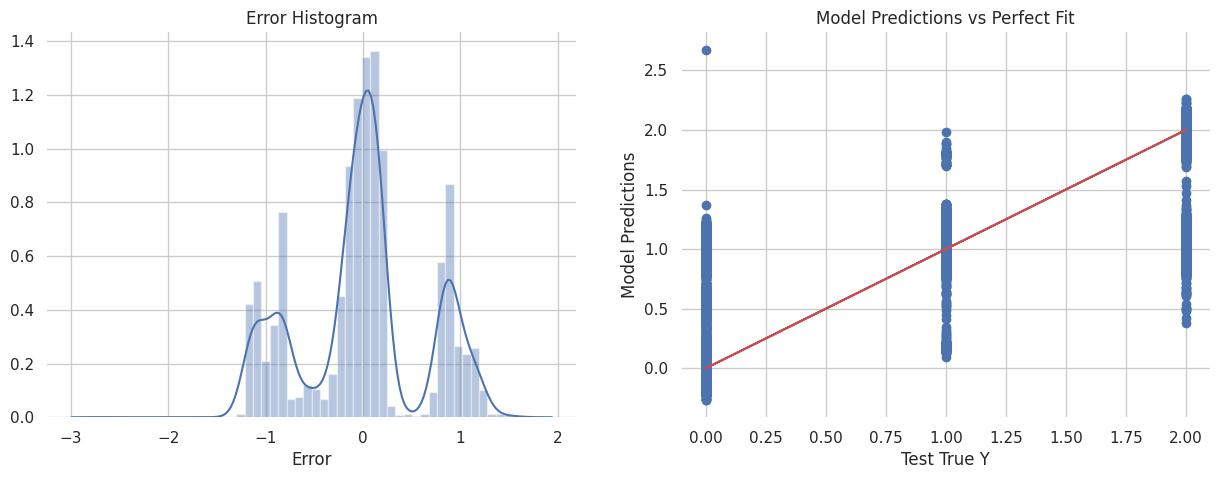

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(X_test.shape[0], 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

## Predicting test data

In [ ]:
final_pred = model.predict(X_)

1/1 [==============================] - 0s 19ms/step


In [ ]:
original_test_df = pd.read_csv('Testing-data.csv')

original_test_df['shop_profile'] = [int(round(pred[0])) for pred in final_pred]
original_test_df['shop_profile'] = original_test_df['shop_profile'].replace([0,1,2], ['High', 'Low', 'Moderate'])

In [ ]:
original_test_df

,shop_id,shop_profile
0,SHOP046,Moderate
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Low
5,SHOP030,Moderate
6,SHOP038,Moderate
7,SHOP029,Low
8,SHOP096,Low
9,SHOP092,Low
